In [1]:
%load_ext autoreload
%autoreload 2

# Minimal Working Example 2
In this notebook, instead of using `setup_default_optimizer`, we set up an optimizer by directly calling a constructor, with a configuration read from a file. After performing optimization, we also plot the result.

## Read Configuration from a File

In [2]:
from cars.utils import read_configs_from_json

configs = read_configs_from_json("../configs/default.json")
cars_config = configs["CARS"]
cars_config["verbose"] = 3  # can be set manually as well
for key, val in cars_config.items():
    print(f"{key}: {val}")

Otype: CARS
description: Default config for CARS optimizer
randgen: uniform_sphere
h: 0.1
Lhat: 1.5
budget: 0
budget_dim_ratio: 100
f_module: problems.simple_funcs
f_name: convex_quartic
record_x_history: True
f_target: 0
target_accuracy: 0.001
verbose: 3


## Initialization

In [3]:
import numpy as np
from cars import CARS, CARSCR, CARSNQ # import optimizer classes

cars = CARS(cars_config, x0=np.random.randn(5))

Initialization done.
	Description: Default config for CARS optimizer
	func name: convex_quartic	budget = 500
	f(x_0) = 0.2018777320303489
	budget = 500
	f_target = 0.0002018777320303489

	Initial x = [ 0.89827465  0.36820775 -0.32855747  0.70681591 -0.78971059]


## Perform Optimization

In [4]:
cars.optimize()

Finished: Reached the function target
Current status = Reached the function target
	eval_cnt = 109
	fsol = 9.853777e-05
	sol = [0.11753785 0.10987904 0.14500244 0.07720984 0.14570647]



## Plot Results

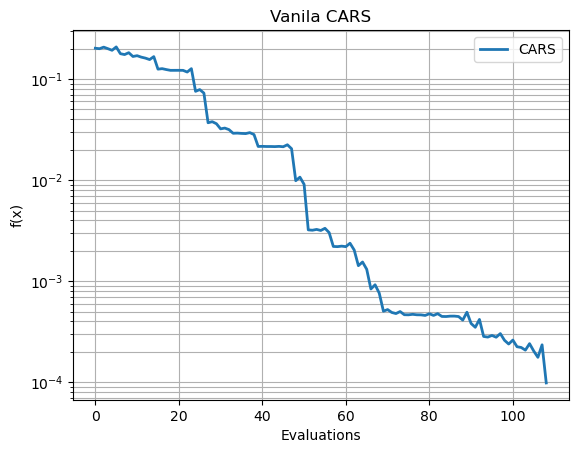

In [5]:
from cars.utils import plot_res

plot_res(
    opts={"CARS": cars},
    field_name="f_history",
    save_file_name=None,
    figsize=(6.4, 4.8),
    title="Vanila CARS",
    ylabel="f(x)",
    linewidth=2,
)